<a href="https://colab.research.google.com/github/Santhosh-S14/COMP-6771-Project/blob/main/COMP_6771_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

(60000, 28, 28)


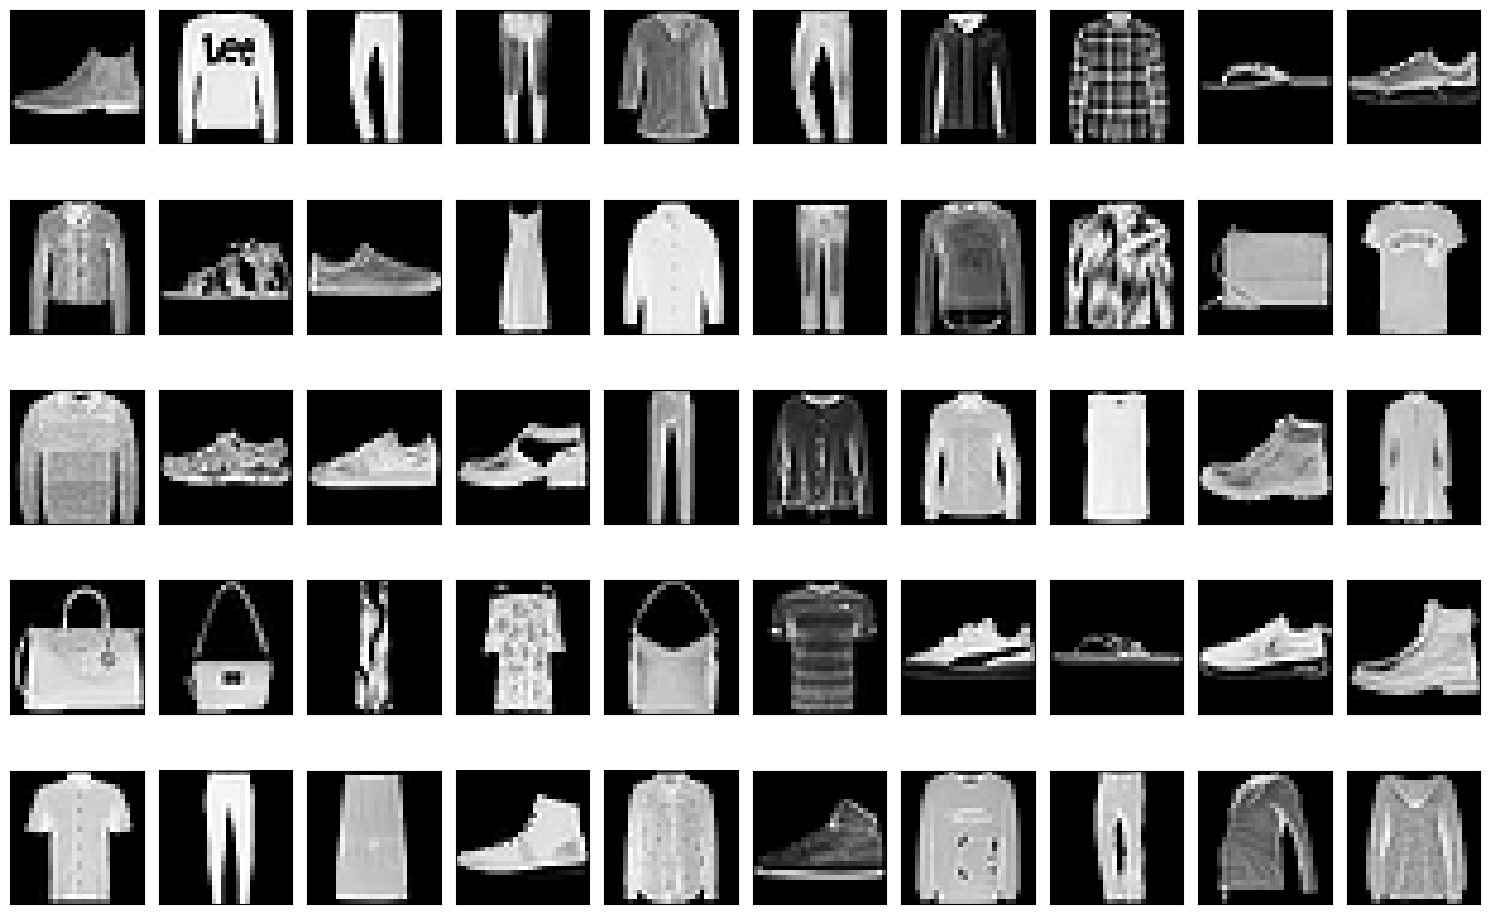

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

num_row = 5
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(50):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(x_test[i], cmap='gray')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [ ]:
input_shape = (28, 28, 1)

inputs = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(inputs, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=200,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
300/300 [==============================] - 3s 5ms/step - loss: 0.0249 - val_loss: 0.0172
Epoch 2/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 3/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0140 - val_loss: 0.0134
Epoch 4/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 5/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 6/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0120 - val_loss: 0.0119
Epoch 7/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 8/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 9/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 10/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0111 - val_loss: 0.0113

In [ ]:
pred = autoencoder.predict(x_test_noisy)
pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

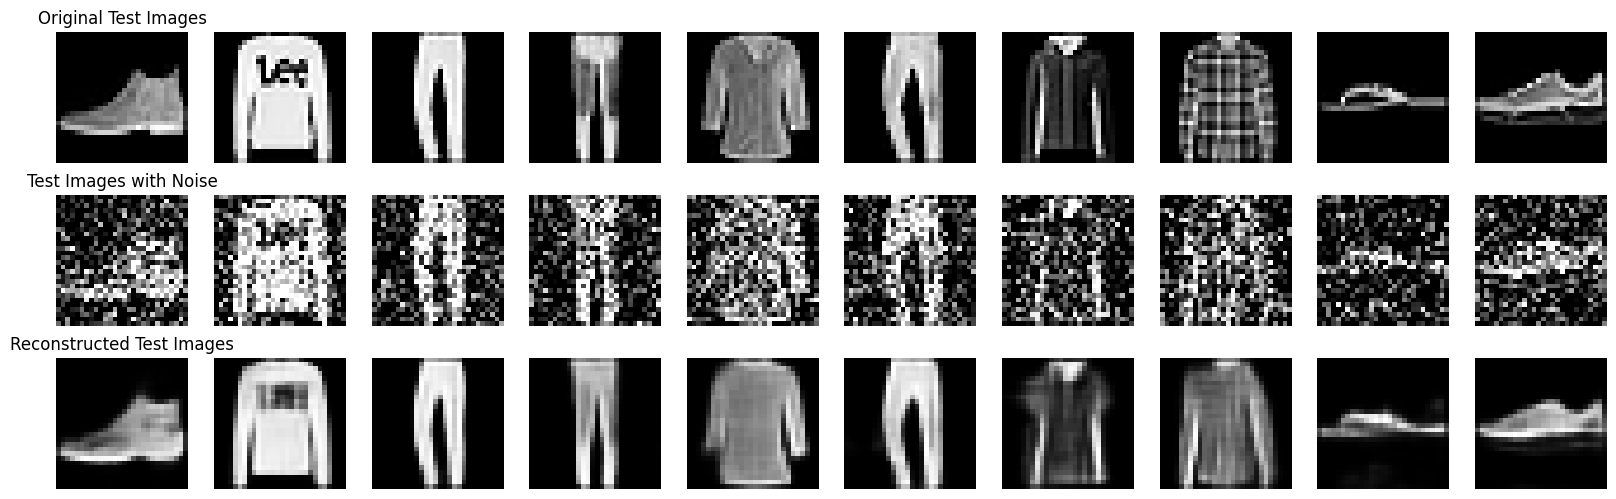

In [ ]:
x_test = np.reshape(x_test, (10000,28,28)) *255
pred = np.reshape(pred, (10000,28,28)) *255
x_test_noisy = np.reshape(x_test_noisy, (-1,28,28)) *255

fig, axs = plt.subplots(3, 10, figsize=(20, 6))

for i in range(10):
    axs[0, i].imshow(x_test[i], cmap='gray')
    axs[0, i].axis('off')
axs[0, 0].set_title('Original Test Images')

for i in range(10):
    axs[1, i].imshow(x_test_noisy[i], cmap='gray')
    axs[1, i].axis('off')
axs[1, 0].set_title('Test Images with Noise')

for i in range(10):
    axs[2, i].imshow(pred[i], cmap='gray')
    axs[2, i].axis('off')
axs[2, 0].set_title('Reconstructed Test Images')

plt.show()
